In [1]:
# https://jakevdp.github.io/blog/2015/10/17/analyzing-pronto-cycleshare-data-with-python-and-pandas/
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

In [4]:
trips = pd.read_csv('data/2015_trip_data.csv',
                    parse_dates=['starttime','stoptime'],
                    infer_datetime_format=True)
print(trips.shape)
trips.head()

(142846, 12)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960.0
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970.0
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988.0
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977.0
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971.0


## Exploring Trips over Time
Let's start by looking at the trend in number of daily trips over the course of the year

In [7]:
ind = pd.DatetimeIndex(trips.starttime)
trips['date'] = ind.date.astype('datetime64')
trips['hour'] = ind.hour

In [11]:
by_date = trips.pivot_table('trip_id', aggfunc='count', index='date', columns='usertype')
by_date.head()

usertype,Annual Member,Short-Term Pass Holder
date,,
2014-10-13,284,125
2014-10-14,268,223
2014-10-15,212,101
2014-10-16,268,127
2014-10-17,195,99


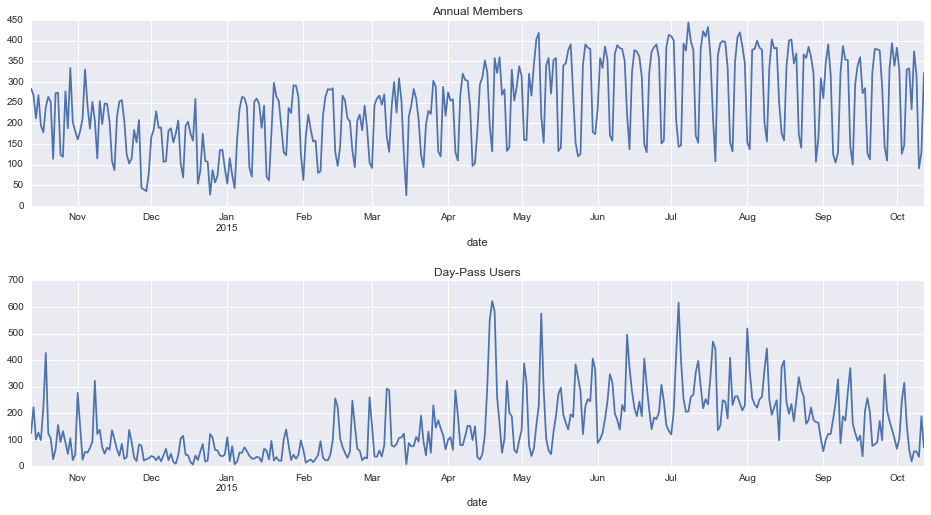

In [18]:
fig, ax = plt.subplots(2, figsize=(16,8))
fig.subplots_adjust(hspace=0.4)
by_date.iloc[:,0].plot(ax=ax[0], title='Annual Members')
by_date.iloc[:,1].plot(ax=ax[1], title='Day-Pass Users')

This plot shows the daily trend, separated by Annual members (top) and Day-Pass users (bottom). A couple observations:
    - The big spike in short-term pass rides in April is likely due to the American Planning Association national conference, held in downtown Seattle that week. The only other time that gets close is the 4th of July weekend.
    - Day pass users seem to show a steady ebb and flow with the seasons; the usage of annual users has not waned as significantly with the coming of fall.
    - Both annual members and day-pass users seem to show a distinct weekly trend.

Let's zoom-in on this weekly trend, by averaging all rides by day of week. Becuase of the change in pattern around January 2015, we'll split the data by both year and by day of week:

In [25]:
by_weekday = by_date.groupby([by_date.index.year, by_date.index.dayofweek]).mean()
by_weekday.columns.name = None
by_weekday

Annual Member  Short-Term Pass Holder
2014 0     211.833333               69.250000
     1     205.416667               62.000000
     2     197.666667               52.000000
     3     179.727273               58.090909
     4     183.000000               65.727273
     5     112.636364              131.363636
     6     115.545455              123.090909
2015 0     282.926829              153.487805
     1     320.750000              110.650000
     2     326.650000              117.150000
     3     323.439024              137.268293
     4     291.853659              155.975610
     5     142.317073              288.756098
     6     120.073171              240.463415

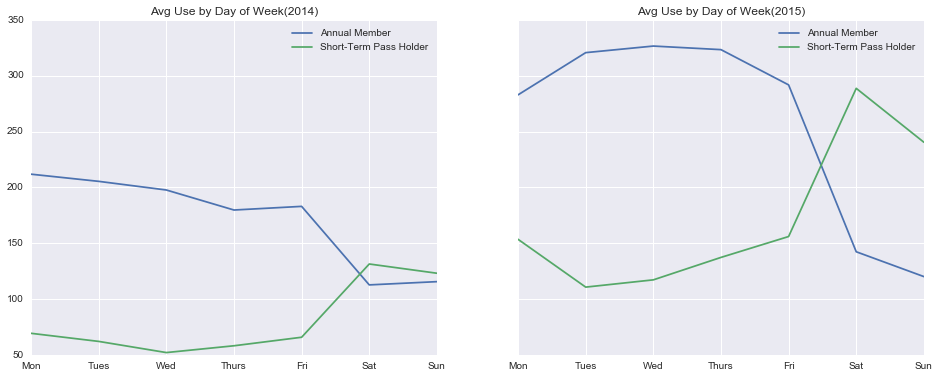

In [35]:
fig, ax = plt.subplots(1,2, figsize=(16,6), sharey=True)
by_weekday.loc[2014].plot(title='Avg Use by Day of Week(2014)',ax=ax[0])
by_weekday.loc[2015].plot(title='Avg Use by Day of Week(2015)',ax=ax[1])
for axi in ax:
    axi.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])

We see a complementary pattern overall: annual users tend to use their bikes during Monday to Friday (i.e. as part of a commute) while day pass users tend to use their bikes on the weekend. This pattern didn't fully develop until the start of 2015, however, especially for annual members: it seems that for the first couple months, users had not yet adapted their commute habits to make use of Pronto!

It's also quite interesting to view the average hourly trips by weekday and weekend. This takes a bit of manipulation:

In [37]:
trips.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,date,hour
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960.0,2014-10-13,10
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970.0,2014-10-13,10
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988.0,2014-10-13,10
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977.0,2014-10-13,10
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971.0,2014-10-13,10


In [70]:
by_hour = trips.pivot_table('trip_id', aggfunc='count', 
                            index=['date','hour'], 
                            columns='usertype').fillna(0).reset_index('hour')
by_hour['weekend'] = (by_hour.index.dayofweek >= 5)
by_hour.head()

usertype,hour,Annual Member,Short-Term Pass Holder,weekend
date,,,,
2014-10-13,10,6.0,0.0,False
2014-10-13,11,54.0,0.0,False
2014-10-13,12,35.0,7.0,False
2014-10-13,13,30.0,9.0,False
2014-10-13,14,32.0,24.0,False


In [71]:
by_hour = by_hour.groupby(['weekend','hour']).mean()
by_hour.index.set_levels([['weekday','weekend'],
                          ["{0}:00".format(i) for i in range(24)]], inplace=True)
by_hour.columns.name = None
by_hour.sample(5)

Annual Member  Short-Term Pass Holder
weekend hour                                        
weekday 12:00      14.319231                9.600000
        8:00       35.373077                3.276923
weekend 6:00        1.728395                0.851852
weekday 2:00        0.723810                1.171429
weekend 2:00        1.200000                2.082353

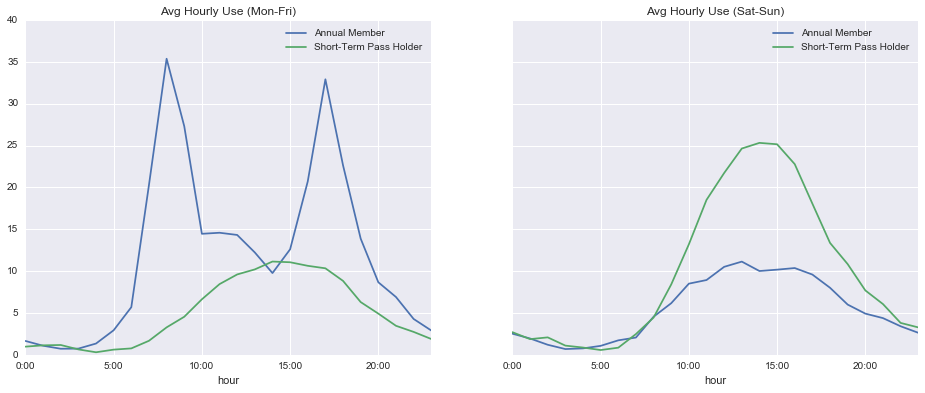

In [74]:
fig, ax = plt.subplots(1,2,figsize=(16,6),sharey=True)
by_hour.loc['weekday'].plot(title='Avg Hourly Use (Mon-Fri)', ax=ax[0])
by_hour.loc['weekend'].plot(title='Avg Hourly Use (Sat-Sun)', ax=ax[1])

We see a clear difference between a "commute" pattern, which sharply peaks in the morning and evening (e.g. annual members during weekdays) and a "recreational" pattern, which has a broad peak in the early afternoon (e.g. annual members on weekends, and short-term users all the time). Interestingly, the average behavior of annual pass holders on weekends seems to be almost identical to the average behavior of day-pass users on weekdays!

## Trip Durations
Next let's take a look at the durations of trips. Pronto rides are designed to be up to 30 minutes; any single use that is longer than this incurs a usage fee of a couple dollars for the first half hour, and about ten dollars per hour thereafter.

Let's look at the distribution of trip durations for Annual members and short-term pass holders:

In [78]:
trips.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,date,hour,minutes
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960.0,2014-10-13,10,16.432250
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970.0,2014-10-13,10,15.439583
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988.0,2014-10-13,10,14.730517
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977.0,2014-10-13,10,14.432283
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971.0,2014-10-13,10,15.398717


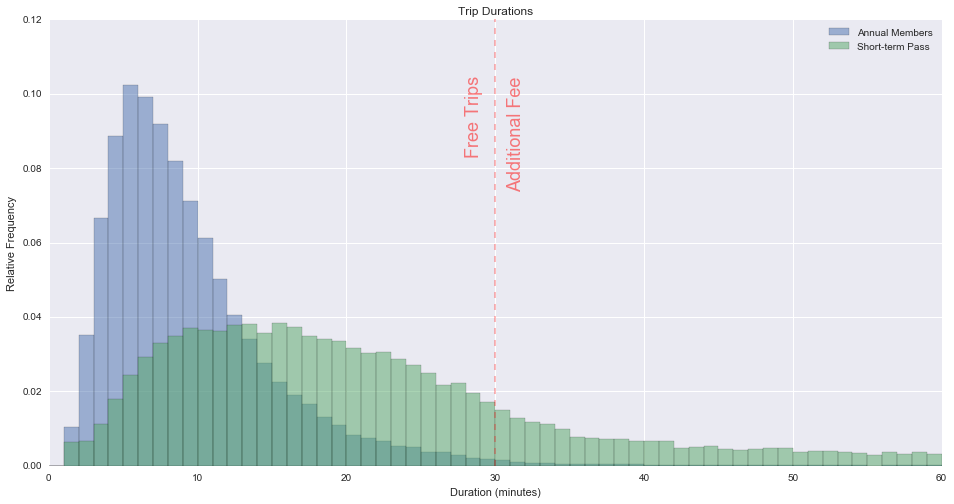

In [103]:
trips['minutes'] = trips['tripduration']/60
trips.groupby('usertype')['minutes'].hist(bins=np.arange(61),alpha=0.5,normed=True,figsize=(16,8))
plt.xlabel('Duration (minutes)')
plt.ylabel('Relative Frequency')
plt.title('Trip Durations')
plt.text(32, 0.09, "Free Trips\n\nAdditional Fee", ha='right',
         size=18, rotation=90, alpha=0.5, color='red')
plt.legend(['Annual Members', 'Short-term Pass'])
plt.axvline(30, linestyle='--', color='red', alpha=0.3);

Here I have added a red dashed line separating the free rides (left) from the rides which incur a usage fee (right). It seems that annual users are much more savvy to the system rules: only a small tail of the trip distribution lies beyond 30 minutes. Around one in four Day Pass Rides, on the other hand, are longer than the half hour limit and incur additional fees. My hunch is that these day pass users aren't fully aware of this pricing structure ("I paid for the day, right?") and likely walk away unhappy with the experience.

## Estimating Trip Distances
It's also interesting to look at the distance of the trips. Distances between stations are not included in Pronto's data release, so we need to find them via another source. Let's start by loading the station data – and because some of the trips start and end at Pronto's shop, we'll add this as another "station":

In [106]:
stations = pd.read_csv('data/2015_station_data.csv')
pronto_shop = dict(id=54, name="Pronto shop",
                   terminal="Pronto shop",
                   lat=47.6173156, long=-122.3414776,
                   dockcount=100, online='10/13/2014')
stations = stations.append(pronto_shop, ignore_index=True)
stations.head()

,id,name,terminal,lat,long,dockcount,online
0,1,3rd Ave & Broad St,BT-01,47.618418,-122.350964,18,10/13/2014
1,2,2nd Ave & Vine St,BT-03,47.615829,-122.348564,16,10/13/2014
2,3,6th Ave & Blanchard St,BT-04,47.616094,-122.341102,16,10/13/2014
3,4,2nd Ave & Blanchard St,BT-05,47.613110,-122.344208,14,10/13/2014
4,5,2nd Ave & Pine St,CBD-13,47.610185,-122.339641,18,10/13/2014


In [107]:
from time import sleep

def query_distances(stations=stations):
    """Query the Google API for bicycling distances"""
    latlon_list = ['{0},{1}'.format(lat, long)
                   for (lat, long) in zip(stations.lat, stations.long)]

    def create_url(i):
        URL = ('https://maps.googleapis.com/maps/api/distancematrix/json?'
               'origins={origins}&destinations={destinations}&mode=bicycling')
        return URL.format(origins=latlon_list[i],
                          destinations='|'.join(latlon_list[i + 1:]))

    for i in range(len(latlon_list) - 1):
        url = create_url(i)
        filename = "distances_{0}.json".format(stations.terminal.iloc[i])
        print(i, filename)
        !curl "{url}" -o {filename}
        sleep(11) # only one query per 10 seconds!


def build_distance_matrix(stations=stations):
    """Build a matrix from the Google API results"""
    dist = np.zeros((len(stations), len(stations)), dtype=float)
    for i, term in enumerate(stations.terminal[:-1]):
        filename = 'queried_distances/distances_{0}.json'.format(term)
        row = json.load(open(filename))
        dist[i, i + 1:] = [el['distance']['value'] for el in row['rows'][0]['elements']]
    dist += dist.T
    distances = pd.DataFrame(dist, index=stations.terminal,
                             columns=stations.terminal)
    distances.to_csv('data/station_distances.csv')
    return distances

# only call this the first time
import os
if not os.path.exists('data/station_distances.csv'):
    # Note: you can call this function at most ~twice per day!
    query_distances()

    # Move all the queried files into a directory
    # so we don't accidentally overwrite them
    if not os.path.exists('queried_distances'):
        os.makedirs('queried_distances')
    !mv distances_*.json queried_distances

    # Build distance matrix and save to CSV
    distances = build_distance_matrix()

0 distances_BT-01.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 18966    0 18966    0     0  28223      0 --:--:-- --:--:-- --:--:-- 28223


1 distances_BT-03.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  5205    0  5205    0     0  13880      0 --:--:-- --:--:-- --:--:-- 13880
100 18622    0 18622    0     0  49658      0 --:--:-- --:--:-- --:--:-- 49658


2 distances_BT-04.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 18262    0 18262    0     0  64989      0 --:--:-- --:--:-- --:--:-- 64989


3 distances_BT-05.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 17924    0 17924    0     0  52256      0 --:--:-- --:--:-- --:--:-- 52256


4 distances_CBD-13.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 17586    0 17586    0     0  62583      0 --:--:-- --:--:-- --:--:-- 62583


5 distances_CBD-03.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 17236    0 17236    0     0  79064      0 --:--:-- --:--:-- --:--:-- 79064


6 distances_CBD-07.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 16916    0 16916    0     0  72290      0 --:--:-- --:--:-- --:--:-- 72290


7 distances_SLU-16.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 16540    0 16540    0     0  48221      0 --:--:-- --:--:-- --:--:-- 48221


8 distances_CBD-06.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 16222    0 16222    0     0  64888      0 --:--:-- --:--:-- --:--:-- 64888


9 distances_CH-01.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 15848    0 15848    0     0  28149      0 --:--:-- --:--:-- --:--:-- 28149


10 distances_CH-02.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2403    0  2403    0     0   8090      0 --:--:-- --:--:-- --:--:--  8090
100 15502    0 15502    0     0  52195      0 --:--:-- --:--:-- --:--:-- 52195


11 distances_CH-03.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 15162    0 15162    0     0  64519      0 --:--:-- --:--:-- --:--:-- 64519


12 distances_CH-05.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 14818    0 14818    0     0  31594      0 --:--:-- --:--:-- --:--:-- 31594


13 distances_CH-06.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  5205    0  5205    0     0  20820      0 --:--:-- --:--:-- --:--:-- 20820
100 14465    0 14465    0     0  57860      0 --:--:-- --:--:-- --:--:-- 57860


14 distances_CH-07.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 14130    0 14130    0     0  43079      0 --:--:-- --:--:-- --:--:-- 43079


15 distances_CH-08.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 13775    0 13775    0     0  55100      0 --:--:-- --:--:-- --:--:-- 55100


16 distances_CH-09.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  6606    0  6606    0     0  21173      0 --:--:-- --:--:-- --:--:-- 21173
100 13429    0 13429    0     0  43041      0 --:--:-- --:--:-- --:--:-- 43041


17 distances_CH-12.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 13082    0 13082    0     0  60009      0 --:--:-- --:--:-- --:--:-- 60009


18 distances_CH-15.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 12746    0 12746    0     0  58200      0 --:--:-- --:--:-- --:--:-- 58200


19 distances_DPD-01.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 12387    0 12387    0     0  56561      0 --:--:-- --:--:-- --:--:-- 56561


20 distances_DPD-03.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 12107    0 12107    0     0  55283      0 --:--:-- --:--:-- --:--:-- 55283


21 distances_EL-01.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11696    0 11696    0     0  37487      0 --:--:-- --:--:-- --:--:-- 37487


22 distances_EL-03.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11348    0 11348    0     0  48495      0 --:--:-- --:--:-- --:--:-- 48495


23 distances_EL-05.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 10999    0 10999    0     0  50223      0 --:--:-- --:--:-- --:--:-- 50223


24 distances_FH-01.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 10629    0 10629    0     0  33958      0 --:--:-- --:--:-- --:--:-- 33958


25 distances_FH-04.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 10300    0 10300    0     0  47031      0 --:--:-- --:--:-- --:--:-- 47031


26 distances_ID-04.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  9951    0  9951    0     0  37409      0 --:--:-- --:--:-- --:--:-- 37409


27 distances_PS-05.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  5205    0  5205    0     0  15174      0 --:--:-- --:--:-- --:--:-- 15174
100  9621    0  9621    0     0  28049      0 --:--:-- --:--:-- --:--:-- 28049


28 distances_PS-04.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  9270    0  9270    0     0  39615      0 --:--:-- --:--:-- --:--:-- 39615


29 distances_SLU-01.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  8889    0  8889    0     0  40589      0 --:--:-- --:--:-- --:--:-- 43788


30 distances_SLU-02.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  8543    0  8543    0     0  36508      0 --:--:-- --:--:-- --:--:-- 36508


31 distances_SLU-04.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  8193    0  8193    0     0  35012      0 --:--:-- --:--:-- --:--:-- 35012


32 distances_SLU-07.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  7847    0  7847    0     0  29611      0 --:--:-- --:--:-- --:--:-- 29611


33 distances_SLU-15.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  7496    0  7496    0     0  53542      0 --:--:-- --:--:-- --:--:-- 53542


34 distances_SLU-17.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  7157    0  7157    0     0  57256      0 --:--:-- --:--:-- --:--:-- 57256


35 distances_SLU-18.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  6794    0  6794    0     0  61763      0 --:--:-- --:--:-- --:--:-- 61763


36 distances_SLU-19.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  6457    0  6457    0     0  51656      0 --:--:-- --:--:-- --:--:-- 51656


37 distances_UD-01.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  6110    0  6110    0     0  55545      0 --:--:-- --:--:-- --:--:-- 55545


38 distances_UD-02.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  5739    0  5739    0     0  45912      0 --:--:-- --:--:-- --:--:-- 52651


39 distances_UD-04.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  5394    0  5394    0     0  38255      0 --:--:-- --:--:-- --:--:-- 38255


40 distances_UD-07.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  5047    0  5047    0     0  35794      0 --:--:-- --:--:-- --:--:-- 35794


41 distances_UW-01.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4695    0  4695    0     0  37560      0 --:--:-- --:--:-- --:--:-- 37560


42 distances_UW-02.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4352    0  4352    0     0  39926      0 --:--:-- --:--:-- --:--:-- 39926


43 distances_UW-04.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4010    0  4010    0     0  36454      0 --:--:-- --:--:-- --:--:-- 36454


44 distances_UW-06.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  3669    0  3669    0     0  26021      0 --:--:-- --:--:-- --:--:-- 29352


45 distances_UW-07.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  3322    0  3322    0     0  30477      0 --:--:-- --:--:-- --:--:-- 30477


46 distances_UW-10.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2972    0  2972    0     0  27018      0 --:--:-- --:--:-- --:--:-- 27018


47 distances_WF-01.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2614    0  2614    0     0  20912      0 --:--:-- --:--:-- --:--:-- 23981


48 distances_WF-04.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2264    0  2264    0     0  14512      0 --:--:-- --:--:-- --:--:-- 16056


49 distances_CBD-05.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1920    0  1920    0     0  15360      0 --:--:-- --:--:-- --:--:-- 17454


50 distances_CD-01.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1581    0  1581    0     0  14372      0 --:--:-- --:--:-- --:--:-- 14372


51 distances_SLU-20.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1233    0  1233    0     0  13117      0 --:--:-- --:--:-- --:--:-- 13117


52 distances_CBD-04.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   888    0   888    0     0   8146      0 --:--:-- --:--:-- --:--:--  8146


53 distances_SLU-21.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   536    0   536    0     0   4917      0 --:--:-- --:--:-- --:--:--  4917
'mv' is not recognized as an internal or external command,
operable program or batch file.


NameError: name 'json' is not defined

In [109]:
import json
distances = build_distance_matrix()

In [111]:
distances = pd.read_csv('data/station_distances.csv', index_col='terminal')
distances.iloc[:5, :5]

,BT-01,BT-03,BT-04,BT-05,CBD-13
terminal,,,,,
BT-01,0.0,422.0,1067.0,867.0,1342.0
BT-03,422.0,0.0,838.0,445.0,920.0
BT-04,1067.0,838.0,0.0,648.0,1123.0
BT-05,867.0,445.0,648.0,0.0,475.0
CBD-13,1342.0,920.0,1123.0,475.0,0.0


In [129]:
stacked = distances.stack() / 1609.34  # convert meters to miles
stacked.name = 'distance'
trips = trips.join(stacked, on=['from_station_id', 'to_station_id'])

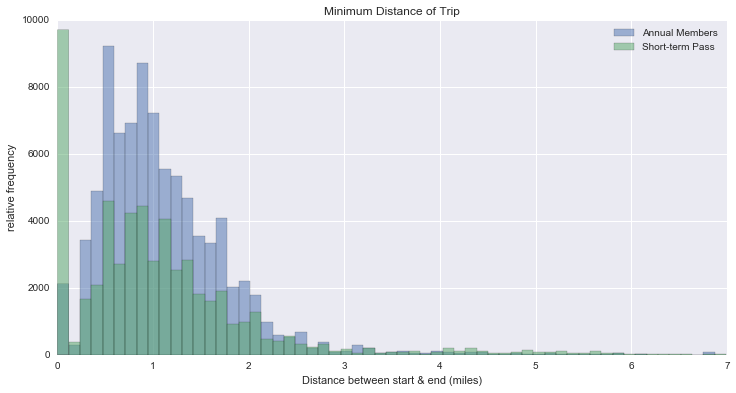

In [148]:
fig, ax = plt.subplots(figsize=(12,6))
trips.groupby('usertype')['distance'].hist(bins=np.linspace(0,6.99,60), alpha=0.5, ax=ax)
plt.xlabel('Distance between start & end (miles)')
plt.ylabel('relative frequency')
plt.title('Minimum Distance of Trip')
plt.legend(['Annual Members', 'Short-term Pass']);

Keep in mind that this shows the shortest possible distance between stations, and thus is a lower bound on the actual distance ridden on each trip. Many trips (especially for day pass users) begin and end within a few blocks. Beyond this, trips peak at around 1 mile, though some extreme users are pushing their trips out to four or more miles.

## Estimating Rider Speed
Given these distances, we can also compute a lower bound on the estimated riding speed. Let's do this, and then take a look at the distribution of speeds for Annual and Short-term users:

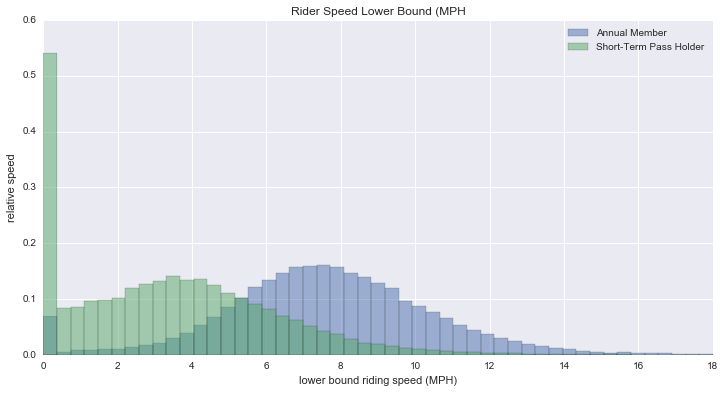

In [156]:
trips['speed'] = trips.distance * 60 / trips.minutes
trips.groupby('usertype')['speed'].hist(bins=np.linspace(0,18,50),alpha=0.5,normed=True,figsize=(12,6))
plt.xlabel('lower bound riding speed (MPH)')
plt.ylabel('relative speed')
plt.title('Rider Speed Lower Bound (MPH')
plt.legend(trips['usertype'].unique())

Interestingly, the distributions are quite different, with annual riders showing on average a higher inferred speed. You might be tempted to conclude here that annual members ride faster than day-pass users, but the data alone aren't sufficient to support this conclusion. This data could also be explained if annual users tend to go from point A to point B by the most direct route, while day pass users tend to meander around and get to their destination indirectly. I suspect that the reality is some mix of these two effects.

It is also informative to take a look at the relationship between distance and speed:

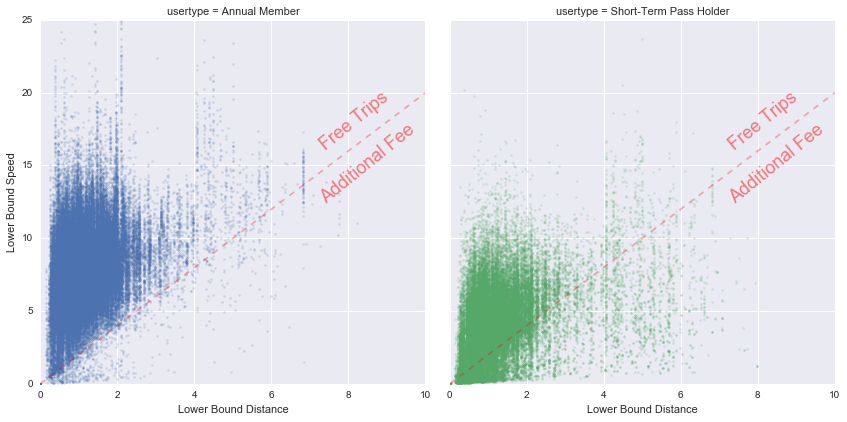

In [159]:
g = sns.FacetGrid(trips, col="usertype", hue='usertype', size=6)
g.map(plt.scatter, "distance", "speed", s=4, alpha=0.2)

# Add lines and labels
x = np.linspace(0, 10)
g.axes[0, 0].set_ylabel('Lower Bound Speed')
for ax in g.axes.flat:
    ax.set_xlabel('Lower Bound Distance')
    ax.plot(x, 2 * x, '--r', alpha=0.3)
    ax.text(9.8, 16.5, "Free Trips\n\nAdditional Fee", ha='right',
            size=18, rotation=39, alpha=0.5, color='red')
    ax.axis([0, 10, 0, 25])

Overall, we see that longer rides tend to be faster – though this is subject to the same lower-bound caveats as above. As above, for reference I have plotted the line separating free trips (above the red line) from trips requiring an additional fee (below the red line). Again we see that the annual members are much more savvy about not going over the half hour limit than are day pass users – the sharp cutoff in the distribution of points points to users keeping close track of their time to avoid an extra charge!

## Trend with Elevation

## Weather
The other common "Seattle is special" argument against the feasibility of cycle share is the weather. Let's take a look at how the number of rides changes with temperature and precipitation.

Fortunately, the data release includes a wide range of weather data:

In [162]:
weather = pd.read_csv('data/2015_weather_data.csv', index_col='Date', parse_dates=True)
print(weather.columns)
print(weather.shape)
weather.head()

Index(['Max_Temperature_F', 'Mean_Temperature_F', 'Min_TemperatureF',
       'Max_Dew_Point_F', 'MeanDew_Point_F', 'Min_Dewpoint_F', 'Max_Humidity',
       'Mean_Humidity ', 'Min_Humidity ', 'Max_Sea_Level_Pressure_In ',
       'Mean_Sea_Level_Pressure_In ', 'Min_Sea_Level_Pressure_In ',
       'Max_Visibility_Miles ', 'Mean_Visibility_Miles ',
       'Min_Visibility_Miles ', 'Max_Wind_Speed_MPH ', 'Mean_Wind_Speed_MPH ',
       'Max_Gust_Speed_MPH', 'Precipitation_In ', 'Events'],
      dtype='object')
(366, 20)


,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events
Date,,,,,,,,,,,,,,,,,,,,
2014-10-13,71.0,62.0,54.0,55.0,51.0,46.0,87.0,68.0,46.0,30.03,29.79,29.65,10.0,10.0,4.0,13.0,4.0,21,0.00,Rain
2014-10-14,63.0,59.0,55.0,52.0,51.0,50.0,88.0,78.0,63.0,29.84,29.75,29.54,10.0,9.0,3.0,10.0,5.0,17,0.11,Rain
2014-10-15,62.0,58.0,54.0,53.0,50.0,46.0,87.0,77.0,67.0,29.98,29.71,29.51,10.0,9.0,3.0,18.0,7.0,25,0.45,Rain
2014-10-16,71.0,61.0,52.0,49.0,46.0,42.0,83.0,61.0,36.0,30.03,29.95,29.81,10.0,10.0,10.0,9.0,4.0,-,0.00,Rain
2014-10-17,64.0,60.0,57.0,55.0,51.0,41.0,87.0,72.0,46.0,29.83,29.78,29.73,10.0,10.0,6.0,8.0,3.0,-,0.14,Rain


In [165]:
weather['Events'].value_counts(dropna=False, normalize=True)

NaN                    0.560109
Rain                   0.385246
Fog                    0.024590
Fog , Rain             0.019126
Rain , Thunderstorm    0.008197
Rain , Snow            0.002732
Name: Events, dtype: float64

In [173]:
by_date = trips.groupby(['date','usertype'])['trip_id'].count()
by_date.name = 'count'
by_date = by_date.reset_index('usertype').join(weather)
by_date.head()

,usertype,count,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,...,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events
2014-10-13,Annual Member,284,71.0,62.0,54.0,55.0,51.0,46.0,87.0,68.0,...,29.79,29.65,10.0,10.0,4.0,13.0,4.0,21,0.00,Rain
2014-10-13,Short-Term Pass Holder,125,71.0,62.0,54.0,55.0,51.0,46.0,87.0,68.0,...,29.79,29.65,10.0,10.0,4.0,13.0,4.0,21,0.00,Rain
2014-10-14,Annual Member,268,63.0,59.0,55.0,52.0,51.0,50.0,88.0,78.0,...,29.75,29.54,10.0,9.0,3.0,10.0,5.0,17,0.11,Rain
2014-10-14,Short-Term Pass Holder,223,63.0,59.0,55.0,52.0,51.0,50.0,88.0,78.0,...,29.75,29.54,10.0,9.0,3.0,10.0,5.0,17,0.11,Rain
2014-10-15,Annual Member,212,62.0,58.0,54.0,53.0,50.0,46.0,87.0,77.0,...,29.71,29.51,10.0,9.0,3.0,18.0,7.0,25,0.45,Rain


Now we can take a look at how the number of rides scales with both Temperature and Precipitation, splitting the data by weekday and weekend:

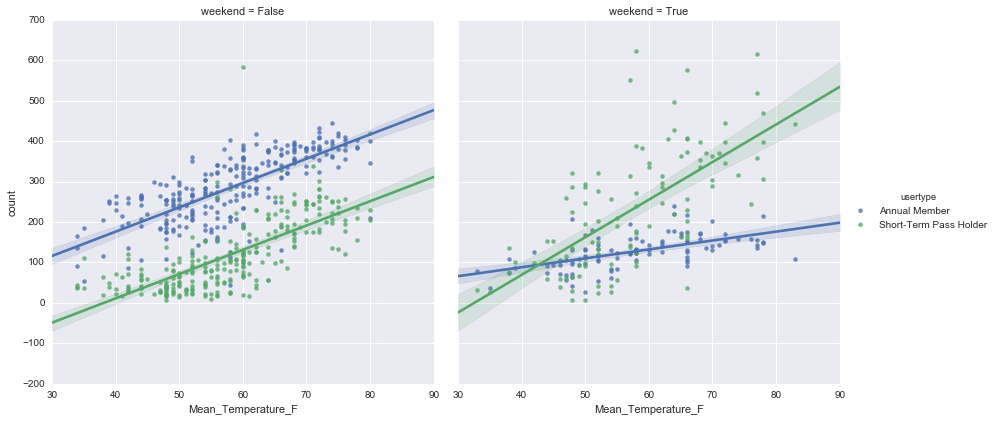

In [179]:
# add a flag indicating weekend
by_date['weekend'] = (by_date.index.dayofweek >= 5)

#----------------------------------------------------------------
# Plot Temperature Trend
g = sns.FacetGrid(by_date, col="weekend", hue='usertype', size=6)
g.map(sns.regplot, "Mean_Temperature_F", "count")
g.add_legend();

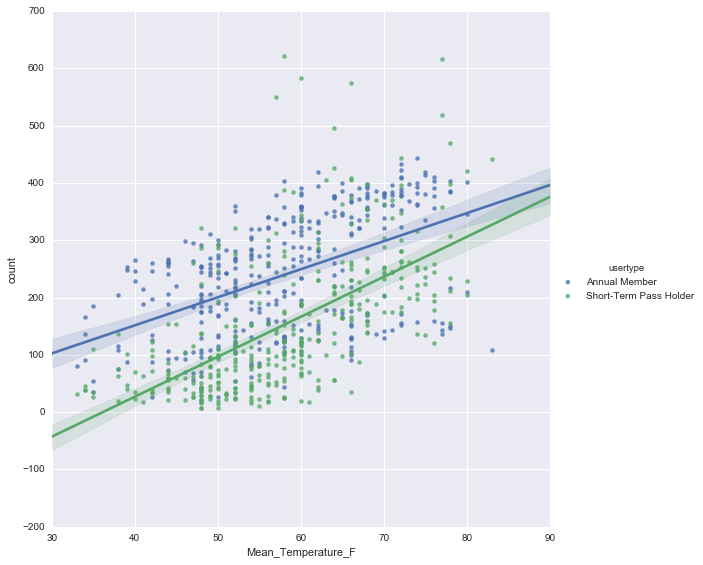

In [184]:
sns.lmplot(x="Mean_Temperature_F", y="count", hue="usertype", data=by_date, size=8);